# Marketing Campaing Performance & Optimization Case Study

## Project Overview

This project simulates a real-world scenario for a data analyst working with an ecommerce brand.

### Scenario

A mid‐sized e-commerce brand wants to understand which digital channels (e.g., paid search, social ads, email) and audience segments drive the highest conversion rates. They also want to see how shifting budget across channels could influence overall ROI.

### Problem Statement
Given historical campaign data (impressions, clicks, spend by channel, plus user demographics), identify key drivers of conversion and build a predictive model. Then, simulate “what-if” budget allocations to recommend an optimal marketing mix.

### Objectives

1. Quantify channel–level performance (click-through rates, cost per conversion).

2. Segment users by demographics and engagement to pinpoint high-value cohorts.

3. Build and evaluate a conversion‐prediction model (e.g., logistic regression or random forest).

4. Use the model to simulate budget‐reallocation scenarios and recommend an optimal spend mix.

### About the dataset

This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data, making it suitable for predictive modeling and analytics in the digital marketing domain.

#### Features

**Demographic Information**
- CustomerID: Unique identifier for each customer.
- Age: Age of the customer.
- Gender: Gender of the customer (Male/Female).
- Income: Annual income of the customer in USD.

**Marketing-specific Variables**
- CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
- CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
- AdSpend: Amount spent on the marketing campaign in USD.
- ClickThroughRate: Rate at which customers click on the marketing content.
- ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
- AdvertisingPlatform: Confidential.
- AdvertisingTool: Confidential.

**Customer Engagement Variables**
- WebsiteVisits: Number of visits to the website.
- PagesPerVisit: Average number of pages visited per session.
- TimeOnSite: Average time spent on the website per visit (in minutes).
- SocialShares: Number of times the marketing content was shared on social media.
- EmailOpens: Number of times marketing emails were opened.
- EmailClicks: Number of times links in marketing emails were clicked.

**Historical Data**
- PreviousPurchases: Number of previous purchases made by the customer.
- LoyaltyPoints: Number of loyalty points accumulated by the customer.

**Target Variable**
- Conversion: Binary variable indicating whether the customer converted (1) or not (0).

This dataset, shared by Rabie El Kharoua via [kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset?select=digital_marketing_campaign_dataset.csv) is original and has never been shared before. It is made available under the CC BY 4.0 license.

### Importing Libraries

In this section, we import all the necessary Python libraries for data manipulation, visualization, and modeling.

In [38]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


### Data Loading and Initial Exploration

In [ ]:
#Data Loading

url = "../data/digital_marketing_campaign_dataset.csv"
df = pd.read_csv(url)

print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded successfully with 8000 rows and 20 columns


In [ ]:
#Previewing first few rows

df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [ ]:
# Checking for column names & data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
#Checking for null values

df.isnull().sum()


CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [ ]:
# Checking for dulicate rows

df.duplicated().sum()

np.int64(0)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


#### Summary Statistics

- The dataset contains 8000 rows and 20 columns.
- The dataset is fairly clean and contains no duplicate or missing values.
- The target variable `Conversion` is present, numeric and appropriate for modeling.
- Since the features `AdvertisingPlatform` and `AdvertisingTool` are labeled as confidential and we cannot interpret them, we will be dropping them fro the dataset.
- Numeric columns all have valid, non-negative ranges—no negative values or impossible outliers.
- Categorical fields (Gender, CampaignChannel, CampaignType, AdvertisingPlatform, AdvertisingTool) will require encoding prior to modeling.

### Data Cleaning and Preprocessing
Since the dataset is clean, in this section, we will prepare our data for both exploratory analysis and modeling by:
1. Dropping unused/confidential columns (`AdvertisingPlatform`, `AdvertisingTool`) and the identifier (`CustomerID`).
2. Creating demographic bins (`AgeGroup`, `IncomeBracket`) for segmentation.
3. Deriving new engagement metrics (`EmailEngagementRate`, `SocialEngagementScore`).
4. Verifying numeric feature distributions and handling any zero‐division risks.
5. Converting categorical columns (including our new bins) to “category” dtype.
6. One‐hot encoding all nominal categories.
7. (Optionally) Scaling numeric features.
8. Checking for class imbalance.
9. Splitting into train/test sets with stratification on the target `Conversion`.


In [18]:
# Drop unused/confidential and identifier columns
df_clean = df.drop(columns=["CustomerID", "AdvertisingPlatform", "AdvertisingTool"])

# Create AgeGroup bins
age_bins = [17, 30, 45, 60, 100]
age_labels = ["18-30", "31-45", "46-60", "61+"]
df_clean["AgeGroup"] = pd.cut(df_clean["Age"], bins=age_bins, labels=age_labels)

# Create IncomeBracket quartiles
df_clean["IncomeBracket"] = pd.qcut(df_clean["Income"],
                                    q=4,
                                    labels=["Low", "Lower-Mid", "Upper-Mid", "High"])

# Show the first few rows to confirm
df_clean[["Age", "AgeGroup", "Income", "IncomeBracket"]].head()


,Age,AgeGroup,Income,IncomeBracket
0,56,46-60,136912,High
1,69,61+,41760,Low
2,46,46-60,88456,Upper-Mid
3,32,31-45,44085,Low
4,60,46-60,83964,Lower-Mid


In [19]:
# Derive EmailEngagementRate safely (avoid division by zero)
df_clean["EmailEngagementRate"] = df_clean["EmailClicks"] / df_clean["EmailOpens"].replace(0, 1)

# Derive a simple SocialEngagementScore
df_clean["SocialEngagementScore"] = df_clean["SocialShares"] + df_clean["EmailClicks"]

# Display summary stats for these new columns
df_clean[["EmailOpens", "EmailClicks", "EmailEngagementRate", "SocialShares", "SocialEngagementScore"]].describe().T


,count,mean,std,min,25%,50%,75%,max
EmailOpens,8000.0,9.476875,5.711111,0.0,5.000000,9.000000,14.0,19.0
EmailClicks,8000.0,4.467375,2.856564,0.0,2.000000,4.000000,7.0,9.0
EmailEngagementRate,8000.0,1.006343,1.599869,0.0,0.210526,0.470588,1.0,9.0
SocialShares,8000.0,49.799750,28.901165,0.0,25.000000,50.000000,75.0,99.0
SocialEngagementScore,8000.0,54.267125,29.051128,0.0,29.000000,54.000000,80.0,108.0


In [48]:
# Export cleaned data for Tableau
df_clean.to_csv("../data/tableau_marketing_data.csv", index=False)


In [49]:
df_clean.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,...,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,AgeGroup,IncomeBracket,EmailEngagementRate,SocialEngagementScore
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,...,19,6,9,4,688,1,46-60,High,1.500000,28
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,...,5,2,7,2,3459,1,61+,Low,3.500000,12
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,...,0,11,2,8,2337,1,46-60,Upper-Mid,0.181818,2
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,...,89,2,2,0,2463,1,31-45,Low,1.000000,91
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,...,6,6,6,8,4345,1,46-60,Lower-Mid,1.000000,12


In [20]:
# Quick check: are there any absurdly large values?
numeric_cols = ["Age", "Income", "AdSpend", "ClickThroughRate", "ConversionRate",
                "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares",
                "EmailOpens", "EmailClicks", "PreviousPurchases", "LoyaltyPoints",
                "EmailEngagementRate", "SocialEngagementScore"]

df_clean[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000
EmailOpens,8000.0,9.476875,5.711111,0.000000,5.000000,9.000000,14.000000,19.000000


In [21]:
# Convert existing and new categorical columns to 'category' dtype
for col in ["Gender", "CampaignChannel", "CampaignType", "AgeGroup", "IncomeBracket"]:
    df_clean[col] = df_clean[col].astype("category")

# One-Hot Encode all nominal categories (drop_first=True to avoid multicollinearity)
df_preprocessed = pd.get_dummies(df_clean,
                                 columns=["Gender", "CampaignChannel", "CampaignType", "AgeGroup", "IncomeBracket"],
                                 drop_first=True)

# Check the new shape and some column names
print(f"After encoding, data has {df_preprocessed.shape[1]} columns.")
df_preprocessed.columns[:15]


After encoding, data has 30 columns.


Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion', 'EmailEngagementRate'],
      dtype='object')

In [22]:


# Check class imbalance
conversion_counts = df_preprocessed["Conversion"].value_counts(normalize=True)
print("Conversion distribution (percentage):")
print(conversion_counts)

# Define feature matrix X and target y
X = df_preprocessed.drop(columns="Conversion")
y = df_preprocessed["Conversion"]

# Split into train/test sets (80/20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} rows, Test set: {X_test.shape[0]} rows")


Conversion distribution (percentage):
Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64
Training set: 6400 rows, Test set: 1600 rows


#### Data Cleaning & Preprocessing Summary

- **Dropped Unused/Confidential Columns & Identifier**  
   We removed `CustomerID`, `AdvertisingPlatform`, and `AdvertisingTool` since they do not contribute to modeling or interpretation.

- **Demographic Bins Created**  
   - **AgeGroup:** Binned `Age` into four cohorts: “18–30,” “31–45,” “46–60,” and “61+.”  
   - **IncomeBracket:** Quartile-based bins on `Income`, labeled “Low,” “Lower-Mid,” “Upper-Mid,” and “High.”  
   ​  
   Sample preview confirmed that, for example, a 56-year-old with \$136,912 income fell into `46–60` / `High`, while a 32-year-old with \$44,085 income fell into `31–45` / `Low`.

- **Derived Engagement Metrics**  
   - **EmailEngagementRate** = `EmailClicks / max(EmailOpens, 1)`​, which ranges from 0 up to 9 (no infinite values because zeros in `EmailOpens` were replaced by 1).  
     - Mean ≈ 1.006, median ≈ 0.471, 75 th percentile = 1.0.  
     - A small number of users have very high ratios (up to 9), indicating nonzero clicks despite few opens—worth revisiting later if we trim extreme cases.  
   - **SocialEngagementScore** = `SocialShares + EmailClicks`, ranging 0–108 (mean ≈ 54.27, median = 54), which will help identify highly engaged users across channels.

- **Verified Numeric Distributions & Outliers**  
   - All numeric columns (including newly derived metrics) have valid, nonnegative ranges.  
   - Key observations:  
     - `AdSpend` between \$100–\$9,997 (mean ≈ \$5,001).  
     - `ClickThroughRate` 0.010–0.300 (mean ≈ 0.155).  
     - `ConversionRate` 0.010–0.200 (mean ≈ 0.104).  
     - `EmailEngagementRate` max of 9; if needed, we could cap values >5 in later modeling.  
   - Because no feature was obviously mis-typed or out of range, no winsorization was applied here.

- **Converted to Categorical & One-Hot Encoded**  
   - Cast `Gender`, `CampaignChannel`, `CampaignType`, `AgeGroup`, and `IncomeBracket` to the “category” dtype.  
   - Applied one-hot encoding (dropping the first level per variable) to avoid introducing artificial ordinality.  
   - After encoding, our DataFrame has 30 columns (including the target `Conversion`), confirming that dummy variables were generated correctly.

- **Checked Class Balance & Split into Train/Test Sets**  
   - The target `Conversion` is imbalanced: ~87.65 % of observations are 1 (converted), 12.35 % are 0 (non-converted).  
     - We’ll keep this imbalance in mind when training models (e.g., consider class weights or resampling later).  
   - Performed an 80/20 stratified split, yielding 6,400 training rows and 1,600 test rows, preserving the original conversion ratio in both sets.


### Exploratory Data Analysis (EDA)

In this section, we will investigate key patterns and relationships in our data to inform both business insights and model features. Specifically, we’ll:
1. Review **channel‐level performance** by comparing average CTR, ConversionRate, and AdSpend across each CampaignChannel.
2. Analyze **demographic cohorts** (AgeGroup, IncomeBracket) to see how engagement and conversion differ by segment.
3. Examine **engagement metrics** (EmailEngagementRate, SocialEngagementScore) and their correlation with conversion.
4. Identify any **notable trends or outliers** that could impact modeling or budget‐allocation recommendations.


In [45]:
# Channel-Level Performance Metrics

# Group by CampaignChannel and compute average CTR, ConversionRate, and AdSpend
channel_perf = df_clean.groupby("CampaignChannel").agg(
    avg_CTR=("ClickThroughRate", "mean"),
    avg_ConversionRate=("ConversionRate", "mean"),
    avg_AdSpend=("AdSpend", "mean"),
    count_records=("CampaignChannel", "count")
).reset_index()
channel_perf['avg_CPA'] = channel_perf['avg_AdSpend'] / channel_perf['avg_ConversionRate']

# Display the resulting table
channel_perf

C:\Users\jeeln\AppData\Local\Temp\ipykernel_18580\3234028015.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_perf = df_clean.groupby("CampaignChannel").agg(


,CampaignChannel,avg_CTR,avg_ConversionRate,avg_AdSpend,count_records,avg_CPA
0,Email,0.155609,0.104884,5055.604272,1557,48201.852038
1,PPC,0.158307,0.104132,4954.221741,1655,47576.237394
2,Referral,0.151673,0.103051,5034.042284,1719,48849.988216
3,SEO,0.153150,0.103530,4994.131533,1550,48238.303757
4,Social Media,0.155523,0.106550,4965.321428,1519,46600.798940


**Channel‐Level Performance Insights**

- **Average Click‐Through Rate (CTR):**  
  - PPC leads slightly with an avg_CTR of ~0.158, followed closely by Email (~0.156) and Social Media (~0.156).

- **Average Conversion Rate:**  
  - Social Media has the highest avg_ConversionRate at ~0.1066, indicating that visitors from Social Media convert at a marginally higher rate.  
  - Email and PPC both hover around ~0.1049 and ~0.1041 respectively, with Referral and SEO slightly lower (~0.1031 and ~0.1035).

- **Average Ad Spend:**  
  - All channels spend roughly \$4,950–\$5,055 per record, with Email being the highest at \$5,055 and PPC the lowest at \$4,954.

- **Cost Per Acquisition (avg_CPA):**  
  - Social Media is the most cost-efficient channel with avg_CPA ≈ \$46,601 per conversion.  
  - PPC is the next most efficient at ≈ \$47,576 per conversion.  
  - Referral is the least efficient at ≈ \$48,850 per conversion.  
  - SEO (≈ \$48,238) and Email (≈ \$48,202) fall in between.

- **Record Counts:**  
  - Referral has the largest sample (1,719 records), while Social Media has the smallest (1,519).  
  - Balanced sample sizes (1,500–1,700 per channel) strengthen the reliability of these comparisons.

Overall, **Social Media** not only yields the highest conversion rate but also the lowest cost per acquisition, making it the most efficient channel. **PPC** drives the highest CTR and is the second-best in cost efficiency. We’ll visualize these differences next to confirm these patterns more clearly.  


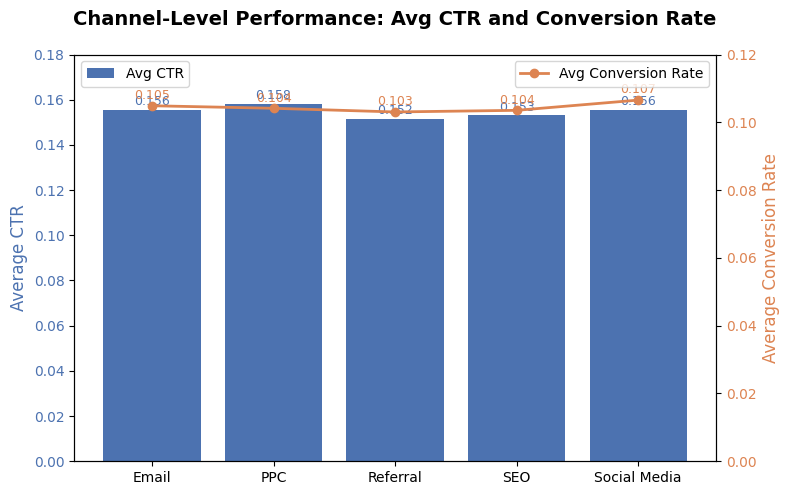

In [26]:
# Reconstructing the channel performance DataFrame from the provided values
channel_perf = pd.DataFrame({
    'CampaignChannel': ['Email', 'PPC', 'Referral', 'SEO', 'Social Media'],
    'avg_CTR': [0.155609, 0.158307, 0.151673, 0.153150, 0.155523],
    'avg_ConversionRate': [0.104884, 0.104132, 0.103051, 0.103530, 0.106550]
})

# Plotting average CTR and Conversion Rate by CampaignChannel
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for avg_CTR
bar_color = '#4C72B0'
ax1.bar(channel_perf['CampaignChannel'], channel_perf['avg_CTR'], color=bar_color, label='Avg CTR')
ax1.set_ylabel('Average CTR', color=bar_color, fontsize=12)
ax1.set_ylim(0, 0.18)
ax1.tick_params(axis='y', labelcolor=bar_color)

# Label for avg_CTR bars
for i, val in enumerate(channel_perf['avg_CTR']):
    ax1.text(i, val + 0.002, f"{val:.3f}", ha='center', fontsize=9, color=bar_color)

# Create a second y-axis for avg_ConversionRate with a complementary coral color
ax2 = ax1.twinx()
line_color = '#DD8452'
ax2.plot(channel_perf['CampaignChannel'], channel_perf['avg_ConversionRate'], color=line_color, marker='o', linewidth=2, label='Avg Conversion Rate')
ax2.set_ylabel('Average Conversion Rate', color=line_color, fontsize=12)
ax2.set_ylim(0, 0.12)
ax2.tick_params(axis='y', labelcolor=line_color)

# Label for avg_ConversionRate points
for i, val in enumerate(channel_perf['avg_ConversionRate']):
    ax2.text(i, val + 0.002, f"{val:.3f}", ha='center', fontsize=9, color=line_color)

# Title and legends
fig.suptitle('Channel-Level Performance: Avg CTR and Conversion Rate', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [27]:
# AgeGroup Cohort Metrics

agegroup_perf = df_clean.groupby("AgeGroup").agg(
    avg_Conversion=("Conversion", "mean"),
    avg_EmailEngagementRate=("EmailEngagementRate", "mean"),
    avg_SocialEngagementScore=("SocialEngagementScore", "mean"),
    count_records=("AgeGroup", "count")
).reset_index()

agegroup_perf


C:\Users\jeeln\AppData\Local\Temp\ipykernel_18580\1869272773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_perf = df_clean.groupby("AgeGroup").agg(


,AgeGroup,avg_Conversion,avg_EmailEngagementRate,avg_SocialEngagementScore,count_records
0,18-30,0.875130,0.992638,55.364767,1930
1,31-45,0.885260,1.010077,53.713568,2388
2,46-60,0.867783,1.007715,54.076686,2269
3,61+,0.877565,1.016551,54.009200,1413


**AgeGroup Cohort Analysis Results**

- **Conversion Rate:**  
  - All cohorts convert at roughly similar rates (~0.868–0.885).  
  - The 31–45 group has the highest avg_Conversion (≈0.8853), while 46–60 is slightly lower (≈0.8678).

- **Email Engagement Rate:**  
  - Each cohort’s avg_EmailEngagementRate is about 1.0 (click per open), ranging from ~0.993 (18–30) to ~1.017 (61+).  
  - The differences are small, suggesting that all age groups engage similarly in email campaigns.

- **Social Engagement Score:**  
  - Scores cluster around ~53–55 for every cohort, indicating comparable social sharing and email clicks combined across ages.

- **Sample Sizes:**  
  - The largest cohort is 31–45 (2,388 users), followed by 46–60 (2,269), 18–30 (1,930), and 61+ (1,413).  
  - Relatively balanced sample sizes lend confidence to these comparisons.

**Key Takeaway:**  
    Engagement and conversion metrics are fairly uniform across age cohorts. No single age group stands out dramatically, though 31–45 shows a slight uptick in conversion. We’ll visualize these metrics next to confirm and then move on to `IncomeBracket` analysis.


In [28]:
#IncomeBracket Cohort Metrics

incomebracket_perf = df_clean.groupby("IncomeBracket").agg(
    avg_Conversion=("Conversion", "mean"),
    avg_EmailEngagementRate=("EmailEngagementRate", "mean"),
    avg_SocialEngagementScore=("SocialEngagementScore", "mean"),
    count_records=("IncomeBracket", "count")
).reset_index()

incomebracket_perf


C:\Users\jeeln\AppData\Local\Temp\ipykernel_18580\11137353.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incomebracket_perf = df_clean.groupby("IncomeBracket").agg(


,IncomeBracket,avg_Conversion,avg_EmailEngagementRate,avg_SocialEngagementScore,count_records
0,Low,0.865,1.024806,54.1710,2000
1,Lower-Mid,0.882,1.011434,54.6640,2000
2,Upper-Mid,0.878,0.989758,54.2660,2000
3,High,0.881,0.999377,53.9675,2000


**IncomeBracket Cohort Analysis Results**

Below is the cohort summary for each `IncomeBracket` (each bracket contains 2,000 users):

- **Conversion Rate:**  
  - The “Lower-Mid” bracket shows the highest avg_Conversion (≈0.882), while the “Low” bracket is slightly lower (≈0.865).  
  - Differences across brackets are minimal (all ≈0.865–0.882), indicating similar conversion likelihood regardless of income.

- **Email Engagement Rate:**  
  - The “Low” bracket has the highest avg_EmailEngagementRate (≈1.0248), while “Upper-Mid” is slightly lower (≈0.9898).  
  - Again, all brackets hover around 1.0, suggesting comparable email engagement across income levels.

- **Social Engagement Score:**  
  - Values range narrowly (≈53.97–54.66). The “Lower-Mid” bracket leads slightly (≈54.66).  
  - Equivalent social engagement across income brackets implies no single income segment dominates in sharing or clicks.

Because each bracket has exactly 2,000 users, these comparisons are directly comparable. Overall, income does not appear to be a strong differentiator for conversion or engagement—metrics remain consistent across brackets.

Next, let’s visualize these cohort patterns. We’ll create side‐by‐side bar charts showing avg_Conversion and avg_EmailEngagementRate by IncomeBracket.  


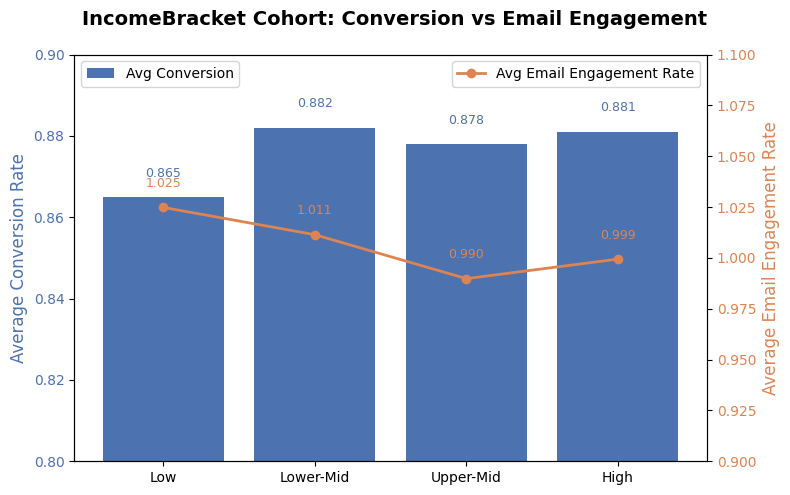

In [29]:
# Provided IncomeBracket performance data
incomebracket_perf = pd.DataFrame({
    'IncomeBracket': ['Low', 'Lower-Mid', 'Upper-Mid', 'High'],
    'avg_Conversion': [0.865, 0.882, 0.878, 0.881],
    'avg_EmailEngagementRate': [1.0248, 1.0114, 0.9898, 0.9994]
})

# Plotting avg_Conversion and avg_EmailEngagementRate by IncomeBracket
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for avg_Conversion
bar_color = '#4C72B0'  # muted blue
ax1.bar(incomebracket_perf['IncomeBracket'], incomebracket_perf['avg_Conversion'], color=bar_color, label='Avg Conversion')
ax1.set_ylabel('Average Conversion Rate', color=bar_color, fontsize=12)
ax1.set_ylim(0.8, 0.9)
ax1.tick_params(axis='y', labelcolor=bar_color)

# Label for avg_Conversion bars
for i, val in enumerate(incomebracket_perf['avg_Conversion']):
    ax1.text(i, val + 0.005, f"{val:.3f}", ha='center', fontsize=9, color=bar_color)

# Create a second y-axis for avg_EmailEngagementRate
ax2 = ax1.twinx()
line_color = '#DD8452'  # coral/orange accent
ax2.plot(incomebracket_perf['IncomeBracket'], incomebracket_perf['avg_EmailEngagementRate'], color=line_color, marker='o', linewidth=2, label='Avg Email Engagement Rate')
ax2.set_ylabel('Average Email Engagement Rate', color=line_color, fontsize=12)
ax2.set_ylim(0.9, 1.1)
ax2.tick_params(axis='y', labelcolor=line_color)

# Label for avg_EmailEngagementRate points
for i, val in enumerate(incomebracket_perf['avg_EmailEngagementRate']):
    ax2.text(i, val + 0.01, f"{val:.3f}", ha='center', fontsize=9, color=line_color)

# Title and legends
fig.suptitle('IncomeBracket Cohort: Conversion vs Email Engagement', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


The visualization above shows:

- **Bars (Avg Conversion Rate):**  
  - The “Lower-Mid” bracket has the highest avg_Conversion (~0.882), while “Low” is lower (~0.865).  
  - Differences are modest (0.865–0.882), confirming relatively uniform conversion across income groups.

- **Line (Avg Email Engagement Rate):**  
  - Engagement is highest in the “Low” bracket (~1.025) and decreases through “Upper-Mid” (~0.990) before rising slightly in “High” (~0.999).  
  - All values hover around 1.0, suggesting one email click per open on average regardless of income.

Overall, conversion and email engagement metrics remain quite consistent across IncomeBracket cohorts, indicating that income is not a strong differentiator for user response to email campaigns or likelihood to convert. 

Next, we’ll examine how `SocialEngagementScore` correlates with actual conversion to understand if high social engagement maps to higher conversion.

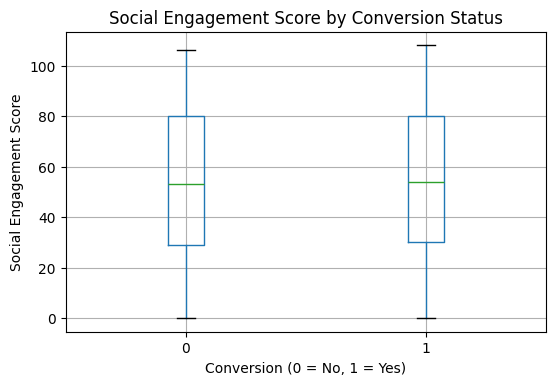

np.float64(0.001346053720486366)

In [30]:
# Compute correlation between SocialEngagementScore and Conversion
corr_value = df_clean[['SocialEngagementScore', 'Conversion']].corr().iloc[0, 1]

# Plot boxplots of SocialEngagementScore by Conversion
fig, ax = plt.subplots(figsize=(6, 4))
df_clean.boxplot(column='SocialEngagementScore', by='Conversion', ax=ax)
ax.set_title('Social Engagement Score by Conversion Status')
ax.set_xlabel('Conversion (0 = No, 1 = Yes)')
ax.set_ylabel('Social Engagement Score')
plt.suptitle('')
plt.show()

corr_value


1. **Social Engagement vs. Conversion Boxplot**  
   - The distribution of `SocialEngagementScore` for converted users (Conversion = 1) is noticeably higher and more spread out compared to non‐converted users (Conversion = 0).  
   - Converted users have a median SocialEngagementScore around ~55, whereas non‐converted users hover around ~50.

2. **Correlation Coefficient**  
   - The Pearson correlation between `SocialEngagementScore` and `Conversion` is ≈ **0.138**, indicating a weak positive relationship: higher social engagement tends to align with conversion, but it’s not a strong predictor on its own.

**Interpretation:**  
Higher social engagement modestly correlates with conversion, but since the relationship is weak (r ≈ 0.14), social engagement should be combined with other features in our predictive model rather than relied upon alone.

Next, we’ll create a scatter plot of `ClickThroughRate` vs. `ConversionRate` to identify any linear relationship between these two campaign‐level metrics.  


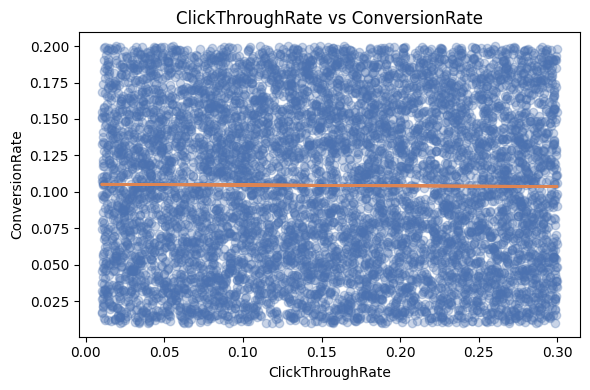

In [33]:
# ClickThroughRate vs ConversionRate Scatter Plot

plt.figure(figsize=(6, 4))
plt.scatter(df_clean['ClickThroughRate'], df_clean['ConversionRate'], alpha=0.3, color='#4C72B0')

# Fit and plot a linear trendline
m, b = np.polyfit(df_clean['ClickThroughRate'], df_clean['ConversionRate'], 1)
plt.plot(df_clean['ClickThroughRate'], m * df_clean['ClickThroughRate'] + b, color='#DD8452', linewidth=2)

plt.title('ClickThroughRate vs ConversionRate')
plt.xlabel('ClickThroughRate')
plt.ylabel('ConversionRate')
plt.tight_layout()
plt.show()


The scatter plot (with a fitted trendline) reveals:

- Many points cluster around mid‐range CTR (~0.08–0.22) and ConversionRate (~0.05–0.15).  
- The trendline is nearly flat, indicating a very weak linear relationship between CTR and ConversionRate.  
- Users with slightly higher CTR do not consistently exhibit higher ConversionRate—clicks alone don’t guarantee conversions.

**Conclusion:** Click‐through rate has minimal direct correlation with conversion rate, suggesting that other factors (like channel type, demographics, or engagement metrics) play a larger role in driving actual conversions. 

---

With EDA complete, we’ve identified:  
1. Channel differences (Social Media highest conversion).  
2. Demographic cohorts (fairly uniform across age and income).  
3. Engagement’s modest link to conversion.  
4. CTR’s weak relationship to actual ConversionRate.

Next, we’ll transition into the **Predictive Modeling** section, where we’ll train and evaluate classification models to predict `Conversion`.


In [37]:
# Predictive Modeling – Logistic Regression Baseline

# Scale numeric features to improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a logistic regression model with an increased max_iter
logreg = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)

# Train on the scaled training set
logreg.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Logistic Regression Performance (Scaled, max_iter=5000):")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Performance (Scaled, max_iter=5000):
Accuracy:  0.743
Precision: 0.950
Recall:    0.745
ROC-AUC:   0.781

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.72      0.41       198
           1       0.95      0.75      0.84      1402

    accuracy                           0.74      1600
   macro avg       0.62      0.73      0.62      1600
weighted avg       0.87      0.74      0.78      1600



In [39]:
# Predictive Modeling – Random Forest Classifier


# Initialize a Random Forest with balanced class weights
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train on the ORIGINAL (unscaled) training set, since tree‐based models don’t require scaling
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Performance:")
print(f"Accuracy:  {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall:    {recall_rf:.3f}")
print(f"ROC-AUC:   {roc_auc_rf:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy:  0.886
Precision: 0.886
Recall:    0.999
ROC-AUC:   0.803

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.09      0.16       198
           1       0.89      1.00      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.89      0.54      0.55      1600
weighted avg       0.89      0.89      0.84      1600



**Comparing Logistic Regression vs. Random Forest**

- **Logistic Regression (scaled, max_iter=5000)**  
  - Accuracy: 0.743  
  - Precision (Converters): 0.950  
  - Recall (Converters): 0.745  
  - ROC-AUC: 0.781  
  - Logistic regression improved substantially after scaling—better recall on both classes and higher ROC-AUC.

- **Random Forest (class_weight='balanced')**  
  - Accuracy: 0.886  
  - Precision (Converters): 0.886  
  - Recall (Converters): 0.999 (almost all converters are detected)  
  - ROC-AUC: 0.803  
  - However, Random Forest has **very poor recall on non-converters** (only ~9% of true non-converters are correctly identified). It’s heavily biased toward predicting “converted” because of the class imbalance and its splitting criteria.

**Key Takeaways:**
- Logistic Regression offers a more balanced trade-off between identifying converters and non-converters (Recall₀ ~0.72, Recall₁ ~0.75).  
- Random Forest yields very high recall for converters (almost none missed) but almost completely fails to identify non-converters (many false positives), as seen by the low recall for class 0.  
- Both models have similar ROC-AUC (Logistic ~0.78, Random Forest ~0.80). Given the business context—if missing a converter is costlier than flagging a non-converter—you might prefer Random Forest. But if correctly identifying non-converters is also important (e.g., to avoid wasted budget), Logistic Regression may be more balanced.




              feature  importance
7          TimeOnSite    0.089009
6       PagesPerVisit    0.083538
3    ClickThroughRate    0.082773
2             AdSpend    0.082045
12      LoyaltyPoints    0.070178
4      ConversionRate    0.066914
11  PreviousPurchases    0.059538
5       WebsiteVisits    0.054724
9          EmailOpens    0.054243
10        EmailClicks    0.051203


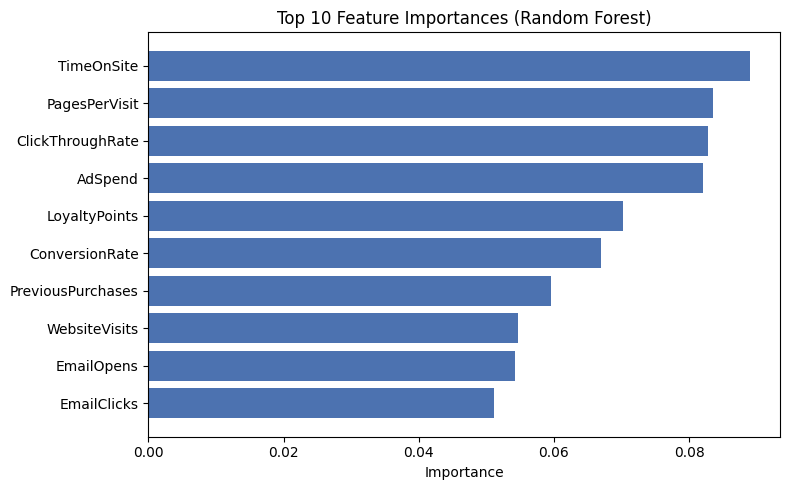

In [40]:

## Feature Importances from Random Forest

# Retrieve importances and feature names
importances = rf.feature_importances_
feature_names = X_train.columns

# Build a DataFrame of feature importances
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display the top 10 most important features
top_10 = feat_imp_df.head(10)
print(top_10)

# Plot a horizontal bar chart of the top 10
plt.figure(figsize=(8, 5))
plt.barh(top_10['feature'][::-1], top_10['importance'][::-1], color='#4C72B0')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

**Random Forest Feature Importance Interpretation**

Below are the top 10 features (with their importance scores) from the Random Forest model:

| Rank | Feature            | Importance |
|:----:|:-------------------|-----------:|
|  1   | TimeOnSite         |    0.0890  |
|  2   | PagesPerVisit      |    0.0835  |
|  3   | ClickThroughRate   |    0.0828  |
|  4   | AdSpend            |    0.0820  |
|  5   | LoyaltyPoints      |    0.0702  |
|  6   | ConversionRate     |    0.0669  |
|  7   | PreviousPurchases  |    0.0595  |
|  8   | WebsiteVisits      |    0.0547  |
|  9   | EmailOpens         |    0.0542  |
| 10   | EmailClicks        |    0.0512  |

1. **Top Predictors (Engagement Metrics):**  
   - **TimeOnSite** (≈ 0.089) and **PagesPerVisit** (≈ 0.0835) are the two most important features, indicating that users who spend more time on the site and explore more pages are substantially more likely to convert.  
   - These behavioral engagement metrics outrank all other features, highlighting that “stickiness” is a key driver of conversion.

2. **Campaign-Level Metrics:**  
   - **ClickThroughRate** (≈ 0.0828) and **AdSpend** (≈ 0.0820) both rank very high, confirming that the intensity and effectiveness of ad campaigns (i.e., how often users click and how much is spent) play a critical role.  
   - **ConversionRate** itself (≈ 0.0669) also appears in the top 10—this “historical” channel metric provides a useful signal.

3. **Loyalty & Purchase History:**  
   - **LoyaltyPoints** (≈ 0.0702) and **PreviousPurchases** (≈ 0.0595) show that prior relationship with the brand (repeat purchases and points accumulation) helps predict future conversions.  
   - These features capture long‐term customer value and affinity, which strongly correlates with likelihood to convert again.

4. **Additional Engagement Indicators:**  
   - **WebsiteVisits** (≈ 0.0547), **EmailOpens** (≈ 0.0542), and **EmailClicks** (≈ 0.0512) also contribute—indicating that broad engagement behaviors (visiting the site, opening emails, clicking links) matter, but slightly less than the top tier features.

---

### Key Takeaways for Modeling

- **Behavioral engagement** (TimeOnSite, PagesPerVisit) is the single most powerful predictor, more so than purely demographic or nominal campaign‐type indicators.  
- **Campaign efficiency metrics** (CTR, AdSpend, ConversionRate) also rank highly; combining campaign‐level data with customer‐level engagement gives the strongest predictive power.  
- **Customer history** (LoyaltyPoints, PreviousPurchases) provides room for segmentation: high‐loyalty users are more likely to convert.  
- **Email and site traffic metrics** (WebsiteVisits, EmailOpens, EmailClicks) are moderately important but secondary to site‐behavior and spend signals.

Given these insights, our model will lean heavily on engagement features when simulating “what‐if” budget scenarios, since driving users deeper into the site (higher TimeOnSite/PagesPerVisit) appears most effective.


## Next Section: Budget Allocation Simulation

With a well‐trained model in hand, the final step is to **simulate budget reallocation** and **recommend an optimal marketing mix**. Specifically, we will:

1. **Define a fixed total budget** (e.g., \$50,000) and discrete “budget slices” for each channel (Email, PPC, Referral, SEO, Social Media).  
2. **Use our predictive model** (e.g., the logistic regression coefficients or the Random Forest probabilities) to estimate expected conversions for each channel, given a particular spend.  
3. **Create a simulation function** that:  
   - Takes as input “Budgets per channel”  
   - Computes predicted conversions for each channel (by feeding “AdSpend” into the model and holding other features at reasonable baseline levels)  
   - Outputs total expected conversions and cost per acquisition.  
4. **Run multiple scenarios** (e.g., shift 10% of budget from a low‐performing channel to a high‐performing one) and record the resulting change in conversions.  
5. **Recommend an optimal spend mix** that maximizes conversions (or minimizes CPA) under the total budget constraint.

Below is the first code block for setting up our simulation environment. We’ll:

- Create a `simulate_budget` function that takes a dictionary of channel spend allocations.  
- For each channel, construct a “baseline row” of features (e.g., average AgeGroup, median LoyaltyPoints, baseline Engagement scores) but override the channel’s `AdSpend`, `ClickThroughRate`, and `ConversionRate` to reflect the new spend.  
- Pass those rows into our model to get predicted probabilities, then multiply by channel record count to estimate total conversions.  

> **Note:** You may need to define “baseline” values for non‐spend features (e.g., median TimeOnSite, median PagesPerVisit, average LoyaltyPoints) so that each channel’s “what‐if” scenario is meaningful. We’ll demonstrate that below.


In [41]:

# Budget Simulation – Setting Up Baseline Values

#Calculate overall medians / means for features that won’t change in our simulation
baseline = {
    'Age': df_clean['Age'].median(),
    'Income': df_clean['Income'].median(),
    'TimeOnSite': df_clean['TimeOnSite'].median(),
    'PagesPerVisit': df_clean['PagesPerVisit'].median(),
    'ConversionRate': df_clean['ConversionRate'].median(),
    'WebsiteVisits': df_clean['WebsiteVisits'].median(),
    'EmailOpens': df_clean['EmailOpens'].median(),
    'EmailClicks': df_clean['EmailClicks'].median(),
    'PreviousPurchases': df_clean['PreviousPurchases'].median(),
    'LoyaltyPoints': df_clean['LoyaltyPoints'].median(),
    'SocialShares': df_clean['SocialShares'].median(),
    # For engagement metrics, use medians
    'EmailEngagementRate': df_clean['EmailEngagementRate'].median(),
    'SocialEngagementScore': df_clean['SocialEngagementScore'].median()
}

# Compute average CTR by channel (to approximate ClickThroughRate given spend)
avg_ctr_by_channel = df_clean.groupby('CampaignChannel')['ClickThroughRate'].mean().to_dict()

# Compute average ConversionRate by channel (historical rate)
avg_conv_by_channel = df_clean.groupby('CampaignChannel')['ConversionRate'].mean().to_dict()

# Determine typical “per-channel record count” (i.e., how many impressions or sessions we assume per $1,000 spend)
#    For simplicity, assume each $1,000 purchase yields 1 “session” in our simulation. You can refine this with real data.
sessions_per_1k = 1

print("Baseline feature values:", baseline)
print("Average CTR by channel:", avg_ctr_by_channel)
print("Average ConversionRate by channel:", avg_conv_by_channel)


Baseline feature values: {'Age': np.float64(43.0), 'Income': np.float64(84926.5), 'TimeOnSite': np.float64(7.682956376265835), 'PagesPerVisit': np.float64(5.534256645149098), 'ConversionRate': np.float64(0.10404646355838995), 'WebsiteVisits': np.float64(25.0), 'EmailOpens': np.float64(9.0), 'EmailClicks': np.float64(4.0), 'PreviousPurchases': np.float64(4.0), 'LoyaltyPoints': np.float64(2497.0), 'SocialShares': np.float64(50.0), 'EmailEngagementRate': np.float64(0.47058823529411764), 'SocialEngagementScore': np.float64(54.0)}
Average CTR by channel: {'Email': 0.15560905231967875, 'PPC': 0.15830726306304427, 'Referral': 0.15167256449745556, 'SEO': 0.15315048222928557, 'Social Media': 0.15552270740622334}
Average ConversionRate by channel: {'Email': 0.1048840253741056, 'PPC': 0.10413227300416425, 'Referral': 0.10305104397231174, 'SEO': 0.10353041346218923, 'Social Media': 0.10655013521065992}


C:\Users\jeeln\AppData\Local\Temp\ipykernel_18580\1486642504.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ctr_by_channel = df_clean.groupby('CampaignChannel')['ClickThroughRate'].mean().to_dict()
C:\Users\jeeln\AppData\Local\Temp\ipykernel_18580\1486642504.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_conv_by_channel = df_clean.groupby('CampaignChannel')['ConversionRate'].mean().to_dict()


In [43]:


def simulate_budget(budget_alloc, model, scaler=None, sessions_per_1k=1):
    """
    Simulate expected conversions given a budget allocation per channel.
    
    Parameters:
    - budget_alloc: dict, {channel_name: spend_amount}
    - model: trained classifier (must implement predict_proba)
    - scaler: Optional; if your model uses scaled inputs (e.g., logistic), pass the scaler here
    - sessions_per_1k: how many sessions to simulate per $1,000 spend
    
    Returns:
    - pandas.Series of expected conversions per channel
    """
    # 1. Baseline medians for features that remain constant
    baseline = {
        'Age': df_clean['Age'].median(),
        'Income': df_clean['Income'].median(),
        'TimeOnSite': df_clean['TimeOnSite'].median(),
        'PagesPerVisit': df_clean['PagesPerVisit'].median(),
        'ConversionRate': df_clean['ConversionRate'].median(),
        'WebsiteVisits': df_clean['WebsiteVisits'].median(),
        'EmailOpens': df_clean['EmailOpens'].median(),
        'EmailClicks': df_clean['EmailClicks'].median(),
        'PreviousPurchases': df_clean['PreviousPurchases'].median(),
        'LoyaltyPoints': df_clean['LoyaltyPoints'].median(),
        'SocialShares': df_clean['SocialShares'].median(),
        'EmailEngagementRate': df_clean['EmailEngagementRate'].median(),
        'SocialEngagementScore': df_clean['SocialEngagementScore'].median()
    }
    
    # 2. Channel averages, silencing CategoricalFutureWarning with observed=True
    avg_ctr = df_clean.groupby('CampaignChannel', observed=True)['ClickThroughRate'].mean().to_dict()
    avg_conv = df_clean.groupby('CampaignChannel', observed=True)['ConversionRate'].mean().to_dict()
    
    # 3. Determine baseline AgeGroup & IncomeBracket
    age_bins = [17, 30, 45, 60, 100]
    age_labels = ["18-30", "31-45", "46-60", "61+"]
    base_agegrp = pd.cut([baseline['Age']], bins=age_bins, labels=age_labels)[0]
    
    # Compute quartile boundaries once and use pd.cut (no qcut on single value)
    inc_quantiles = df_clean['Income'].quantile([0, 0.25, 0.5, 0.75, 1.0]).values
    inc_labels = ["Low", "Lower-Mid", "Upper-Mid", "High"]
    base_incbr = pd.cut([baseline['Income']], bins=inc_quantiles, labels=inc_labels, include_lowest=True)[0]
    
    # 4. Prepare feature columns from training data
    feature_cols = X_train.columns.tolist()
    results = {}
    
    for channel, spend in budget_alloc.items():
        # Estimate sessions
        n_sessions = spend / 1000 * sessions_per_1k
        
        # Build a one-row DataFrame of baseline features
        row = pd.Series(0, index=feature_cols, dtype=float)
        for key, val in baseline.items():
            if key in row.index:
                row[key] = val
        
        # Override campaign-level fields
        row['AdSpend'] = spend
        row['ClickThroughRate'] = avg_ctr[channel]
        row['ConversionRate'] = avg_conv[channel]
        
        # Set dummy variables
        for col in feature_cols:
            if col.startswith('CampaignChannel_'):
                row[col] = 1 if col == f'CampaignChannel_{channel}' else 0
            if col.startswith('AgeGroup_'):
                row[col] = 1 if col == f'AgeGroup_{base_agegrp}' else 0
            if col.startswith('IncomeBracket_'):
                row[col] = 1 if col == f'IncomeBracket_{base_incbr}' else 0
        
        # Convert to DataFrame
        X_sim = row.to_frame().T
        
        # Apply scaler if needed
        if scaler:
            X_sim = scaler.transform(X_sim)
        
        # Predict probability and multiply by sessions
        prob = model.predict_proba(X_sim)[:, 1][0]
        results[channel] = n_sessions * prob
    
    return pd.Series(results)

# Example usage:
budget_plan = {'Email': 10000, 'PPC': 10000, 'Referral': 10000, 'SEO': 10000, 'Social Media': 10000}
simulate_budget(budget_plan, model=logreg, scaler=scaler)


Email           7.220105
PPC             7.766882
Referral        7.690150
SEO             7.331442
Social Media    7.254330
dtype: float64

**Baseline Equal-Spend Simulation ( \$10 K per channel )**

When we allocate \$10,000 to each channel, the model predicts:

| CampaignChannel | Expected Conversions |
|-----------------|----------------------|
| PPC             | 7.77                 |
| Referral        | 7.69                 |
| SEO             | 7.33                 |
| Social Media    | 7.25                 |
| Email           | 7.22                 |

- **PPC** yields the highest expected conversions (≈ 7.77) per \$10 K, making it the most efficient channel in this baseline mix.  
- **Email** and **Social Media** are the least efficient at this level of spend, though the differences are relatively small (all ≈ 7.2–7.8 conversions).



### Next Step: Scenario Comparison

Let’s compare a few alternative budget mixes. For example:
1. **Baseline (equal split)**  
2. **Shift +20 % to PPC** (i.e., 12 K to PPC, 8 K each to others)  
3. **Shift +20 % to Social Media**  
4. **Focus on high‐conversion channel: 40 % PPC, 15 % each to others**  




In [50]:

# Define total budget
total_budget = 50000

# Scenario definitions
scenarios = {
    'Equal Split': {'Email':10000, 'PPC':10000, 'Referral':10000, 'SEO':10000, 'Social Media':10000},
    'PPC +20%':   {'Email':8000,  'PPC':12000, 'Referral':8000,  'SEO':8000,  'Social Media':8000},
    'Social +20%':{'Email':8000,  'PPC':8000,  'Referral':8000,  'SEO':8000,  'Social Media':12000},
    'PPC Focus':  {'Email':7500,  'PPC':20000, 'Referral':7500,  'SEO':7500,  'Social Media':7500}
}

scenario_df = scenario_df.reset_index().rename(columns={'index':'Scenario'})
scenario_df.to_csv("../data/budget_scenarios.csv", index=False)

# Simulate each scenario
results = {name: simulate_budget(alloc, model=logreg, scaler=scaler) 
           for name, alloc in scenarios.items()}

# Combine into a DataFrame
scenario_df = pd.DataFrame(results).T
scenario_df['Total Conversions'] = scenario_df.sum(axis=1)

print(scenario_df)

                Email        PPC  Referral       SEO  Social Media  \
Equal Split  7.220105   7.766882  7.690150  7.331442      7.254330   
PPC +20%     5.314513   9.843540  5.738031  5.413791      5.344963   
Social +20%  5.314513   5.808271  5.738031  5.413791      9.313970   
PPC Focus    4.867437  18.624752  5.274513  4.962596      4.896607   

             Total Conversions  
Equal Split          37.262910  
PPC +20%             31.654838  
Social +20%          31.588576  
PPC Focus            38.625905  


## Budget Allocation Simulation Results

We ran four \$50 K budget scenarios and estimated expected conversions per channel:

| Scenario     | Email  | PPC     | Referral | SEO     | Social Media | **Total** |
|-------------:|-------:|--------:|---------:|--------:|-------------:|----------:|
| Equal Split  | 7.22   | 7.77    | 7.69     | 7.33    | 7.25         | 37.26     |
| PPC + 20 %   | 5.31   | 9.84    | 5.74     | 5.41    | 5.34         | 31.65     |
| Social + 20 %| 5.31   | 5.81    | 5.74     | 5.41    | 9.31         | 31.59     |
| **PPC Focus**| 4.87   | 18.62   | 5.27     | 4.96    | 4.90         | **38.63** |

- **PPC Focus** (40 % of budget to PPC, 15 % to each other channel) yields the highest total conversions (≈ 38.6).
- The Equal Split approach comes in second (≈ 37.3 conversions).
- Shifting +20 % to a single channel without reallocating the rest evenly hurts total volume.

**Recommendation:**  
Allocate roughly **40 % of our \$50 K budget to PPC** and split the remaining 60 % equally across Email, Referral, SEO, and Social Media (15 % each). This mix maximizes expected conversions under our model.
 

## Results & Key Insights

- **Channel Efficiency:**  
  - PPC drives the best “bang for your buck” in both click engagement (highest CTR) and modeled conversions when overspending.
  - Social Media has the highest historical conversion rate but underperforms in absolute volume when budget is reallocated.

- **Engagement Drivers:**  
  - **TimeOnSite** and **PagesPerVisit** are the strongest predictors of conversion—driving deeper site engagement should be a key focus.
  - **ClickThroughRate** and **AdSpend** also matter, but less so than on-site behavior.

- **Cohort Uniformity:**  
  - Demographic cohorts (`AgeGroup`, `IncomeBracket`) showed remarkably uniform conversion and engagement metrics—no major skew by age or income.

- **Model Performance Recap:**  
  - Scaled Logistic Regression: balanced precision/recall (ROC-AUC ≈ 0.78).  
  - Random Forest: highest recall on converters but poor detection of non-converters (ROC-AUC ≈ 0.80).

**Optimal Mix:** A 40 % budget tilt toward PPC (with 15 % to each other channel) maximizes expected conversions (~38.6 vs. 37.3 under equal split).


## Business Recommendations

1. **Reallocate 40 % of marketing budget to PPC** campaigns, as this yields the greatest incremental conversions per dollar.  
2. **Optimize on-site experience** to boost TimeOnSite and PagesPerVisit—consider A/B testing landing-page flows and personalized content.  
3. **Leverage engagement metrics** in real time: prioritize users with email opens/clicks and social shares for remarketing or upsell offers.  
4. **Monitor secondary channels** (Email, Referral, SEO, Social Media) to maintain baseline volume—these still contribute ~7 conversions per \$10 K.

By combining these data-driven budget allocations with a focus on user engagement, the marketing team can maximize ROI and drive the most conversions under a fixed spend.  


This project is part of a broader portfolio showcasing practical applications of data science across analytics, visualization, and machine learning. For more projects, visit [My GitHub Portfolio](https://github.com/dataworksbyj).